<a href="https://colab.research.google.com/github/ferranlarroyaub/03MIAR----Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_Ferran_Larroya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Ferran Larroya Paixà  <br>
Url: https://github.com/ferranlarroyaub/03MIAR----Algoritmos-de-Optimizacion<br>
Google Colab: https://colab.research.google.com/drive/15TVRrXar2vSCpMEIYJFBtzUatRobe-U0?usp=sharing <br>



## Problema 2. Organizar los horarios de partidos de La Liga
He escogido el problema 2, que pese a ser un problema común de Programación Lineal Entera, para este trabajo he aplicado dos técnicas vistas en la asignatura para optimizar problemas: **Técnica Voraz** y **Algoritmo Genético**. Aunque me he centrado en el primer de los casos (voracidad) con más detalle, he añadido un apartado final con la aplicación de un algoritmo genético para comparar resultados. Mediante la voracidad, he conseguido una audiencia máxima de 6.72 millones de espectadores, mientras que con un algoritmo genético he conseguido mejorar ligeramente dicha cantidad (7.17 millones). Sin embargo, con el algoritmo genético el resultado varia ligeramente en cada ejecución.

<br>
<br>

## Descripción del problema
Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

Los horarios disponibles se conocen a priori y son los siguientes:

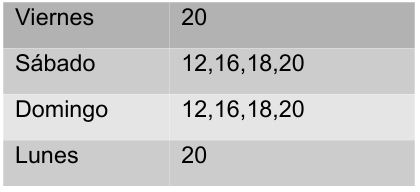



En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

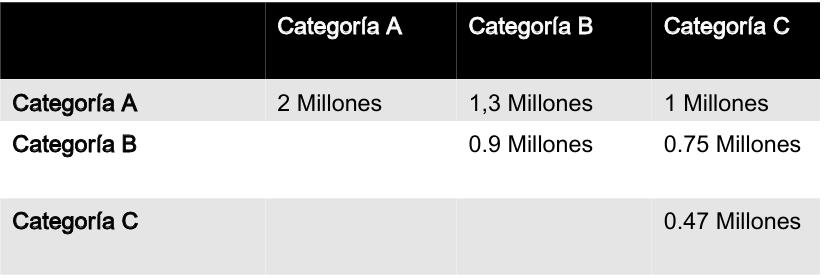


Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

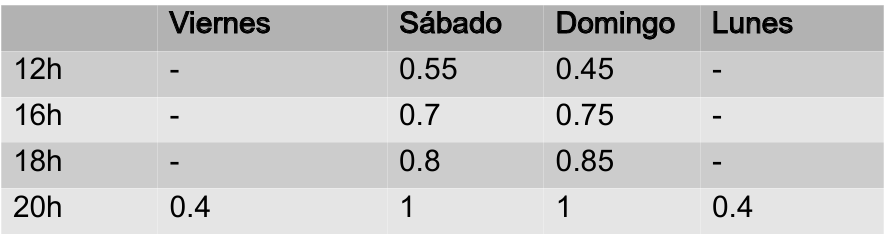



Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de coincidencias:

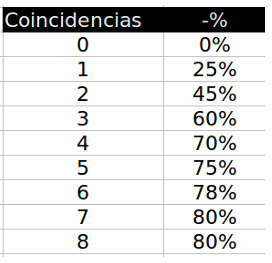

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla

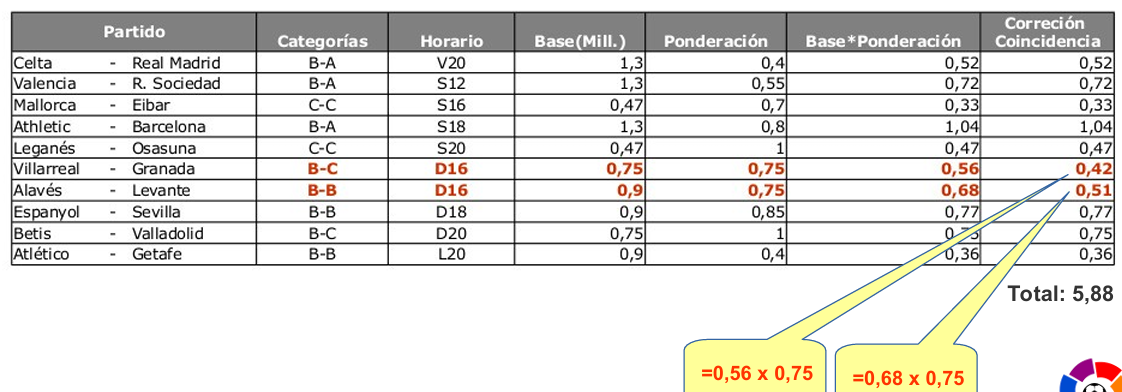


                                        

#Modelo


1. **El espacio de soluciones** viene dado por el conjunto de todas las combinaciones posibles de asignaciones de partidos a horarios.

- Sabemos que hay $n=20$ equipos y $p=10$ partidos, con 3 equipos de clase A, 11 de clase B y 6 de clase C. Por lo tanto, primero debemos contabilizar cuantos enfrentamientos posibles hay entre todos los equipos. Esto se trata de calcular cuantas combinaciones de dos equipos se pueden hacer de entre los 20 equipos disponibles (etiquetados como A1, A2, A3, B1, B2, B3...) segun la clase. Aplicando combinatoria (combinación sin repetición) obtenemos que hay un total de $190$ partidos posibles entre los 20 equipos. Esto es:

$$ C(n,2) = C(20,2) =  \begin{pmatrix}
  20 \\
  2
\end{pmatrix}
= \frac{20!}{2!(20-2)!} = 190
$$

Sin saber la fórmula para la combinación sin repetición, esta cantidad de podría obtener también de manera directa. Para los partidos posibles entre equipos de distintas clases bastaría con multiplicar la cantidad de equipos de una clase por la de la otra (e.j., # partidos A vs C = 3 · 6 = 18). Para los partidos de una misma clase habría que obtener todas las combinaciones posibles como $n(n-1)/2$ (e.j., # partidos A vs A = 3(3-1)/2 = 3). Sumando todas las cantidades obtenidas obtenemos 190 enfrentamientos posibles entre todos los equipos de distintas clases.

<br>

- Ahora debemos tener en cuenta que solo hay 10 partidos en una jornada, pues cada equipo juega una sola vez. Entre los 20 equipos, debemos contabilizar de cuantas maneras se pueden emparejar para formar 10 partidos, sin que repetir los equipos. De manera intuitiva, podemos ver que hay $n!=20!$ maneras primeramente de ordenar todos los equipos. Como los agrupamos en 10 parejas, deberíamos divdir esta cantidad por un factor exponencial de $2^{p}=2^{10}$, ya que el orden de las parejas no importa. Finalmente, como el orden de las 10 parejas tampoco importa falta añadir un factor $p!=10!$ en la división. Se podría usar directamente la fórmula de combinatoria para combinaciones en subgrupos de tamaño fijo sin importar el orden (emparejar $n=2p$ elementos en $p$ parejas):

$$ \frac{(2p)!}{p!·2^{p}} \approx 6·10^{8}$$

Es decir, tenemos aproximadamente 600 millones de maneras de generar 10 partidos entre los 20 equipos sin repetir equipos.

<br>

- Finalmente, debido a que existen $h=10$ horarios disponibles. Si asumimos que cada uno de los $p=10$ partidos seleccionados puede ser asignado a cualquiera de los 10 horarios sin restricciones, tenenos $10^{10}$ posible combinaciones de asignación de los 10 partidos en los 10 horarios (10 mil millones):

$$h^{p}=10^{10}$$

Por lo tanto, el tamaño total del espacio de soluciones viene dado por la multiplicación entre todas las posibles elecciones de los 10 enfrentamientos y las maneras que se pueden asignar entre los 10 horarios disponibles:

$$ \frac{(2p)!}{p!·2^{p}} · h^{p} \approx 6·10^{8} · 10^{10} \approx 6·10^{18}$$

Se trata de un número enorme, intratable si queremos resolver el problema por fuerza bruta (búsqueda exahustiva). Sin embargo, la utilización de técnicas vistas en la asginatura y las condiciones y las restricciones del problema (que ahora implementaremos con detalle), hacen que el espacio de soluciones sea reducido significativamente y pueda ser resoluble de manera computacional, encontrando una buena solución.

<br>

*Nota: En realidad podríamos empezar el problema directamente con una jornada definida, es decir, con los 10 partidos ya escogidos. De hecho, la premisa inicial del problema es esta. Esto reduciria el problema a solamente ver de que manera se pueden distribuir estos partidos en los 10 horarios ($10^{10}$), sujeto a las respectivas restricciones y penalizaciones. Sin embargo, sigue siendo un número demasiado grande para resolver el problema por fuerza bruta.*

<br>
<br>

2. **La función objetivo** de este problema es la maximización de la audiencia total de la jornada, corregida segun los horarios, a la vez que se intenta minimizar la penalización de audiencia por coincidencia de horarios. Esto es:

$$ Max \ F = \sum_{i=1}^{p=10} \left( A_{p_{i}}·C_{h_{i}}·P_{h_{i}}\right) $$

donde $p_{i}$ es el partido $i$, asignado a un horario $h_{i}$. $A_{p_{i}}$ es la audiencia base (conocida, en horario de máxima audiencia) del partido $p_{i}$. $C_{h_{i}}$ el factor de correción horario (según la tabla) y $P_{h_{i}}$ el factor de penalización por coincidencia de horarios. És decir, segun la tabla, si hay 3 partidos (2 coincidencias) en un mismo horario, la audiencia de cada uno de los 3 partidos debe ser reducida en un $45\%$, o lo que es lo mismo, multiplicarla por un factor corrector de $0.55$.


<br>
<br>

3. **Implementación de restricciones**. Tenemos una serie de restricciones que reducen el espacio de soluciones del problema. La manera de implementarlas dependerá del método aplicado para resolver el problema. Aquí las introducimos de una manera general y formal:

  - Es evidente que **cada partido solamente se puede asignar a 1 horario** (cada partido se juega solamente una vez). Por lo tanto, una vez asignado un partido a un horario no podemos volver a utilizar dicho partido. Para ponerlo en formalismo matemático, consideramos una variable binaria, $x_{ij}$, que es 1 si el partido $i$ es asignado en el horario $j$ y 0 en caso contrario. Entonces, para un partido concreto $i$, la suma para todos los posibles horarios $j$ debe ser 1:
  
      $$\sum_{j=1}^{h=10} x_{ij}  = 1 \ \ \  \forall i  $$
  
  - Tanto las restricciones correspondientes a la **penalización por coincidencia** de partidos en un mismo horario como a la **correción de la audiencia base por horario**, estan implementadas directamente a la función de coste, que contabiliza la audiencia total que queremos maximizar.
  
  - Tenemos la restricción de que debe haber 1 partido en los horarios de mínima audiencia, viernes a las 20h y lunes a las 20h. Por lo tanto, una vez se asignen dos partidos en ambos horarios respectivamente, los quitamos de los horarios disponibles. Siguiendo el formalismo anterior, esto se traduce como:

  $$ \sum_{i=1}^{p=10} x_{ij_{V}} = 1 $$
  $$ \sum_{i=1}^{p=10} x_{ij_{L}} = 1 $$

  donde $j_{V}$ es el horario de viernes a las 20h y $j_{L}$ es el horario de lunes a las 20h.

<br>

#Análisis

El espacio de soluciones está definido por la cantidad de formas en que podemos asignar los $p=10$ partidos a los $h=10$ horarios disponibles. Cada partido debe jugarse en un horario, por lo que hay $10^{10}$ (10 mil millones) de combinaciones posibles de asignar los partidos a los horarios. Si además, no conocemos los partidos con antelación, tendremos del orden de $10^{8}$ posibles maneras de seleccionar 10 partidos de entre los 20 equipos, como ya hemos visto.

<br>

1. **Complejidad generación de partidos**
  
  - El orden de complejidad de la generación de los 190 partidos posibles cuadrático, $\mathcal{O} (n^{2})$, siendo $n$ el número de equipos (20).

  - Si queremos aplicar una técnica voraz y disponer primeramente de todos los partidos ordenados por audiencia (de mayor a menor), requiere usar un algoritmo de ordenación, que tiene una complejidad de $\mathcal{O} (m·\log m)$, siendo $m=190$ todos los partidos posibles.

  - Finalmente, debemos escoger $p=10$ partidos óptimos (con mayor audiencia base) de entre los $m=190$. Esto tiene un orden de complejidad lineal en $m$, $\mathcal{O} (m)$.

  - Cabe destacar, como hemos dicho, que podemos usar una jornada aleatoria de partidos (teniendo en cuenta los equipos y sus clases) o simplemente de una manera visual y directa elegir aquellos partidos que vemos que generaran una mayor audiencia.

<br>

2. **Complejidad asignación de partidos a horarios**

  - Ahora hay que asignar los $p=10$ partidos a los $h=10$ distintos horarios. La complejidad dependerá de la técnica usada. Por ejemplo, para un **algoritmo voraz**, se iran añadiendo uno a uno los mejores partidos a los mejores horarios, evaluando la penalización para cada horario. Esto tiene una complejidad de $\mathcal{O} (p·h) = \mathcal{O} (10·10)$. En realidad, primero se añadirian dos partidos a los horarios de lunes y viernes (restriccion, con complejidad constante $\mathcal{O}(1)$) y la asignación a los distintos horarios se realizaria solamente con 8 partidos y 8 horarios.

  - El cálculo final de la audiencia corregida y penalizada para cada equipo vendria dada simplemente por $\mathcal{O} (p) = \mathcal{O} (10)$.

<br>

Por lo tanto, el orden de complejidad del problema, resolviendolo con una técnica voraz, viene dado por

$$ \mathcal{O} (n^{2}) + \mathcal{O} (m·\log m) + \mathcal{O}(m) + \mathcal{O}(p·h) + \mathcal{O}(p) \ \ \rightarrow  \ \ \mathcal{O}(n^{2})$$

en caso de que debamos escoger los $p=10$ partidos óptimos de todos los posibles enfrentamientos entre los $n=20$ equipos. En caso de disponer de los partidos predefinidos, el orden de complejidad se reduce a la iteración entre los partidos en los distintos horarios, $\mathcal{O}(p·h)$. En cualquier caso, se trata de un orden de complejidad muy asumible y una técnica muy rápida y eficaz que escala considerablemente bien con el número de equipos.


<br>


Si trataramos de resolver el problema por fuerza bruta, explorando todas las combinaciones posibles, el orden de complejidad seria de $\mathcal{O} (p^{h}) = \mathcal{O} (10^{10})$. Por lo que es inabordable.

En realidad, este tipo de problemas es común que se resuelvan mediante Programación Lineal Entera (ILP), y con la ayuda de librerias externas que dispongan de un "solver" para resolver las ecuaciones lineales. En este caso, en el peor caso el orden de complejidad es exponencial $\mathcal{O}(2^{n})$, pues se trata de un problema NP-difícil, por lo que no hay ningún algoritmo que lo pueda resolver de manera exacta en tiempo polinómico. La ventaja de la ILP es que nos garantiza encontrar una solución exacta óptima, aunque solamente es viable para valores pequeños de $n$.




<br>

#Diseño

Pese a que utilizando Programación Lineal Entera (ILP) seriamos capaces de encontrar una solución óptima exacta, y dicho problema encaja en los típicos de ILP (asignación de recursos, planificación de horarios, etc), no utilizaremos dicha técnica ya que requiere el uso de librerias externas como PuLP que disponen de un *solver* para resolver el modelo, que vendria dado por la función objetivo a maximizar y las restricciones en forma de expresiones lineales.

En este trabajo usaremos un método visto durante la asignatura. En concreto aplicaremos un **algoritmo voraz** para ir asignado los mejores partidos (con más audiencia) a los mejores horarios y evaluando la penalización. Iremos actualizando la mejor solución y finalmente calcularemos la audiencia total. La ventaja, como hemos visto, es la complejidad computacional. Se trata de una técnica muy rápida y eficiente para nuestro caso. La principal desventaja es que estas técnicas no garantizan encontrar la solución óptima exacta, aunque puede ser una buena aproximación a ella. Al final del trabajo aplicaremos tambien un **algoritmo genético** para comparar los resultados.




<br>

### Paso 1. Definición de las variables del problema
Definimos las variables del problema: los equipos, los tipos de partido segun la clase, los horarios, la audiencia base, las correcciones de audiencia por horario y la penalización por coincidencia de horario.

In [38]:
# ========================
# 1. DATOS DEL PROBLEMA
# ========================

# Equipos: Los que llevan el prefijo A (A1, A2, A3) son de la clase A, etc.
# Hay 3 de clase A, 11 de clase B y 6 de clase C.
equipos = {
    'A': ['A1', 'A2', 'A3'],
    'B': [f'B{i}' for i in range(1, 12)],
    'C': [f'C{i}' for i in range(1, 7)]
}


# Audiencia base (en horario máxima audiencia, sábado 20h) para cada tipo de partido
audiencia_base = {
    ('A', 'A'): 2.0, ('A', 'B'): 1.3, ('A', 'C'): 1.0,
    ('B', 'B'): 0.9, ('B', 'C'): 0.75, ('C', 'C'): 0.47
}

# Factores de corrección por horario
factores_correcion_horario = {
    "Viernes 20h": 0.4, "Sabado 12h": 0.55, "Sabado 16h": 0.7, "Sabado 18h": 0.8, "Sabado 20h": 1.0,
    "Domingo 12h": 0.45, "Domingo 16h": 0.75, "Domingo 18h": 0.85, "Domingo 20h": 1.0, "Lunes 20h": 0.4
}

# Penalización por coincidencia de partidos en el mismo horario.
penalizacion_coincidencia = {0: 1, 1: 1, 2: 0.75, 3: 0.55, 4: 0.4, 5: 0.3, 6: 0.25, 7: 0.28, 8: 0.2, 9: 0.2}



<br>

### Paso 2. Generación y elección de partidos
Este paso puede ser evitable, creando simplemente una lista con los 10 partidos pre-definidos teniendo em cuenta las clases de equipos que hay. Para hacerlo de una manera más formal, obtenemos todos los posibles 190 enfrentamientos entre los equipos disponibles, luego los ordenamos de mayor a menor audiencia (según la tabla de audiencia base) y finalmente escogemos los 10 mejores partidos (sin repetir equipos).



In [39]:
# ===========================================================
# 2. GENERACIÓN DE PARTIDOS Y ELECCIÓN DE 10 PARTIDOS ÓPTIMOS
# ===========================================================

todos_equipos = equipos['A'] + equipos['B'] + equipos['C']
partidos_posibles = []

# Generamos todos los enfrentamientos posibles entre equipos
# Cada elemento de la lista final sera una tupla con los dos equipos, sus clases y la audiencia base
for i in range(len(todos_equipos)):  # bucle aninado de complejidad n^2 (n=20 equipos)
    for j in range(i + 1, len(todos_equipos)):
        e1, e2 = todos_equipos[i], todos_equipos[j]
        clase1 = 'A' if e1 in equipos['A'] else 'B' if e1 in equipos['B'] else 'C'
        clase2 = 'A' if e2 in equipos['A'] else 'B' if e2 in equipos['B'] else 'C'
        if (clase1, clase2) in audiencia_base:
            partidos_posibles.append((e1, e2, clase1, clase2, audiencia_base[(clase1, clase2)]))

# Ordenamos los partidos de mayor a menor audiencia base  (complejidad quasi-lineal m·log(m), con m=190)
partidos_posibles.sort(key=lambda p: p[4], reverse=True)

# Seleccionamos los 10 mejores partidos sin repetir equipos (complejidad lineal en m, con m=190)
# Lo hacemos recorriendo la lista ordenada por audiencia y vamos añadiendo los partidos (sin repetir equipos)
partidos = []
usados = set()
for p in partidos_posibles:
    if p[0] not in usados and p[1] not in usados:
        partidos.append(p)
        usados.add(p[0])
        usados.add(p[1])
        if len(partidos) == 10:   # Cuando tenemos los 10 primeros partidos con mejor audiencia sin repetir, paramos
            break

print('Los partidos seleccionados para la jornada son:')
print('')
for partido in partidos:
    print(f"{partido[0]} vs {partido[1]}"
          f" --> clase ({partido[2]} vs {partido[3]})"
          f" --> audiencia base: {audiencia_base[(partido[2], partido[3])]} millones")

Los partidos seleccionados para la jornada son:

A1 vs A2 --> clase (A vs A) --> audiencia base: 2.0 millones
A3 vs B1 --> clase (A vs B) --> audiencia base: 1.3 millones
B2 vs B3 --> clase (B vs B) --> audiencia base: 0.9 millones
B4 vs B5 --> clase (B vs B) --> audiencia base: 0.9 millones
B6 vs B7 --> clase (B vs B) --> audiencia base: 0.9 millones
B8 vs B9 --> clase (B vs B) --> audiencia base: 0.9 millones
B10 vs B11 --> clase (B vs B) --> audiencia base: 0.9 millones
C1 vs C2 --> clase (C vs C) --> audiencia base: 0.47 millones
C3 vs C4 --> clase (C vs C) --> audiencia base: 0.47 millones
C5 vs C6 --> clase (C vs C) --> audiencia base: 0.47 millones


*Nótese que probablemente seria una mejor combinación combinar 2 equipos clase B con 2 de clase C (ejemplo: B10 vs C1 y B11 vs C2) y emparejar solamente dos partidos con equipos de clase C (ejemplo: C3 vs C4 y C5 vs C6). Sin embargo, solamente es un ejemplo y el objetivo de este problema no és encontrar la mejor jornada, sino dada ya una jornada cualquiera, maximizar su audiencia*

<br>

### Paso 3. Técnica Voraz. Asignación óptima de partidos a horarios
Aplicamos una técnica voraz para tratar de maximizar la audiencia de la jornada, teniendo en cuenta las penalizaciones por coincidencia. La idea general es ir asignado partidos de nuestra lista ordenada por audiencia base a los distintos horarios disponibles. Lo haremos calculando la audiencia esperada considerando la penalización y actualizando el valor y el horario en caso de mejora.

Debemos tener en cuenta que hay la restricción de que los horarios de Viernes 20h y Lunes 20h (mínima audiencia) deben contener 1 partido asignado respectivamente. La manera de abordar esta restricción con el método voraz es añadiendo a dichos horarios los partidos de menor audiencia base, para minimizar la pérdida. Luego los sacamos de la lista de partidos y aplicamos la voracidad con los 8 restantes.

In [40]:
# ======================================================
# 3. ASIGNACIÓN ÓPTIMA DE PARTIDOS A HORARIOS POR VORACIDAD
# ======================================================

# Horarios disponibles (claves del diccionario)
horarios = list(factores_correcion_horario.keys())

# Inicializamos el diccionario de horarios con partidos asignados
asignacion = {h: [] for h in horarios}

# Asignamos los partidos de menor audiencia a viernes y lunes (para minimizar pérdida)
# Como tenemos la lista ordenada, son los 2 últimos de la lista (y los quitamos de la lista de perdidos)
asignacion["Viernes 20h"].append(partidos.pop(-1))
asignacion["Lunes 20h"].append(partidos.pop(-1))

# Asignamos los demás partidos de manera voraz. La complejidad es del orden de p·h (# partidos · # horarios)
for partido in partidos:    # Iteramos cada partido y inicializamos el mejor horario y mejor valor de audiencia
    mejor_horario = None
    mejor_valor = 0

    for h in horarios: # Iteramos para cada horario
        # Calculamos la audiencia esperada considerando la penalización
        num_partidos_h = len(asignacion[h])  # numero de partidos en horario h
        penalizacion = penalizacion_coincidencia.get(min(9, num_partidos_h + 1))  # penalización en dicho horario
        audiencia_esperada = partido[4] * factores_correcion_horario[h] * penalizacion  # audiencia corregida y penalizada

        # Buscamos el horario que maximiza la audiencia esperada de manera voraz, actualizando los valores/horario si mejora
        if audiencia_esperada > mejor_valor:
            mejor_valor = audiencia_esperada
            mejor_horario = h

    # Una vez recorridos todos los horarios, asignamos el partido al mejor horario encontrado
    if mejor_horario:
        asignacion[mejor_horario].append(partido)

### Paso 4. Mostrar resultados
En este último paso simplemente mostramos los resultados en pantalla, y los guardamos en listas para poderlos representar en una tabla final de datos, con el partido, el horario asginado, la audiencia base, la audiencia corregida por horario y la audiencia final penalizada.

In [41]:
# ========================
# 4. RESULTADOS
# ========================


audiencia_total = 0

# Listas para el DataFrame final (tabla de datos)
lista_partido=[]
lista_tipo_partido=[]
lista_horario=[]
lista_audiencia_base=[]
lista_ponderacion=[]
lista_audiencia_corregida_horario=[]
lista_penalizacion_factor=[]
lista_audiencia_final=[]

# Mostramos para cada horario el número de partidos asignados y, dentro de cada horario,
# los partidos asignados y su audiencia (base, corregida, final)
for h, partidos_h in asignacion.items():
    print(f"Horario {h}: {len(partidos_h)} partidos")
    for p in partidos_h:
        num_partidos_h = len(asignacion[h])
        correcion_horario = factores_correcion_horario[h]
        penalizacion_coincidencia_aplicada = penalizacion_coincidencia.get(min(9, num_partidos_h))
        audiencia_final = p[4] * correcion_horario * penalizacion_coincidencia_aplicada  # Calculamos la audiencia final penalizada

        # Mostramos resultados
        print(f"  - Partido {p[0]} vs {p[1]} ({p[2]} vs {p[3]})")
        print(f"    * Audiencia base: {p[4]}M")
        print(f"    * Factor de horario: {correcion_horario}")
        print(f"    * Audiencia corregida horario: {p[4]*correcion_horario:.2f}M")
        print(f"    * Penalización por coincidencia: {penalizacion_coincidencia_aplicada}")
        print(f"    * Audiencia final esperada: {audiencia_final:.2f}M\n")

        # Guardamos en listas para después
        lista_partido.append(p[0]+' vs '+p[1])
        lista_tipo_partido.append(p[2]+' vs '+p[3])
        lista_horario.append(h)
        lista_audiencia_base.append(p[4])
        lista_ponderacion.append(correcion_horario)
        lista_audiencia_corregida_horario.append(round(p[4]*correcion_horario,2))
        lista_penalizacion_factor.append(penalizacion_coincidencia_aplicada)
        lista_audiencia_final.append(round(audiencia_final,2))

    print('')

print(f"Audiencia total penalizada: {sum(lista_audiencia_final):.2f}M")

Horario Viernes 20h: 1 partidos
  - Partido C5 vs C6 (C vs C)
    * Audiencia base: 0.47M
    * Factor de horario: 0.4
    * Audiencia corregida horario: 0.19M
    * Penalización por coincidencia: 1
    * Audiencia final esperada: 0.19M


Horario Sabado 12h: 0 partidos

Horario Sabado 16h: 1 partidos
  - Partido C1 vs C2 (C vs C)
    * Audiencia base: 0.47M
    * Factor de horario: 0.7
    * Audiencia corregida horario: 0.33M
    * Penalización por coincidencia: 1
    * Audiencia final esperada: 0.33M


Horario Sabado 18h: 1 partidos
  - Partido B4 vs B5 (B vs B)
    * Audiencia base: 0.9M
    * Factor de horario: 0.8
    * Audiencia corregida horario: 0.72M
    * Penalización por coincidencia: 1
    * Audiencia final esperada: 0.72M


Horario Sabado 20h: 2 partidos
  - Partido A1 vs A2 (A vs A)
    * Audiencia base: 2.0M
    * Factor de horario: 1.0
    * Audiencia corregida horario: 2.00M
    * Penalización por coincidencia: 0.75
    * Audiencia final esperada: 1.50M

  - Partido B6 

<br>

**Tabla final de datos en DataFrame**

In [42]:
import pandas as pd
df = pd.DataFrame()
df['Partido'] = lista_partido
df['Tipo Partido'] = lista_tipo_partido
df['Horario'] = lista_horario
df['Audiencia Base'] = lista_audiencia_base
df['Factor Correción'] = lista_ponderacion
df['Audiencia Corregida'] = lista_audiencia_corregida_horario
df['Factor Penalización'] = lista_penalizacion_factor
df['Audiencia Penalizada'] = lista_audiencia_final

df.loc[len(df)] = ['Total','---', '---', sum(df['Audiencia Base']), '---', sum(df['Audiencia Corregida']), '---',
                   sum(df['Audiencia Penalizada'])]
display(df)

,Partido,Tipo Partido,Horario,Audiencia Base,Factor Correción,Audiencia Corregida,Factor Penalización,Audiencia Penalizada
0,C5 vs C6,C vs C,Viernes 20h,0.47,0.4,0.19,1.0,0.19
1,C1 vs C2,C vs C,Sabado 16h,0.47,0.7,0.33,1.0,0.33
2,B4 vs B5,B vs B,Sabado 18h,0.90,0.8,0.72,1.0,0.72
3,A1 vs A2,A vs A,Sabado 20h,2.00,1.0,2.00,0.75,1.50
4,B6 vs B7,B vs B,Sabado 20h,0.90,1.0,0.90,0.75,0.68
5,B8 vs B9,B vs B,Domingo 16h,0.90,0.75,0.68,1.0,0.68
6,B2 vs B3,B vs B,Domingo 18h,0.90,0.85,0.77,1.0,0.77
7,A3 vs B1,A vs B,Domingo 20h,1.30,1.0,1.30,0.75,0.98
8,B10 vs B11,B vs B,Domingo 20h,0.90,1.0,0.90,0.75,0.68
9,C3 vs C4,C vs C,Lunes 20h,0.47,0.4,0.19,1.0,0.19


## EXTRA. Algoritmo genético
Intentamos encontrar una solución cercana a la óptima mediante un algoritmo genético. Usando la misma combinación de partidos que hemos encontrado anteriormente cuando hemos aplicado la técnica voraz.

- A partir de ese conjunto de 10 partidos, creamos una población inicial de un cierto tamaño, que será el conjunto inicial de soluciones. Cada una de ellas vendrá dada por la asignación aleatoria de los 10 partidos en los 10 horarios (por lo que puede haber coincidencias, es puramente aleatoria). Eso si, respetando la restricción de asignar un partido en horarios de viernes 20h y lunes 20h (inicialmente los de menor audiencia). Este proceso tiene un orden de complejidad de $\mathcal{O}(p·n)$, siendo $p$ el tamaño de la población (elegimos 50) y $n=10$ el número de partidos.

- Creamos una función que evalue la audiencia para cada asignación de horarios (debidamente corregida por el factor de correción horario y la penalización por coincidencia). Esto tiene complejidad lineal con el número de partidos (sumar audiencia por partido). Por lo tanto $\mathcal{O}(n)$ para cada individuo de la población.

- Luego, seleccionamos los individuos ("soluciones") más aptos de la población actual para la reproduccion. Elegimos $k=3$. Este proceso tiene una complejidad lineal con el tamaño de la población  $\mathcal{O}(p)$ ya que hay que evaluar la audiencia de cada individuo para elegir los más prometedores.

- Cross-over: cruzamos las especies. Es decir, intercambiamos horarios entre dos soluciones para generar nuevas combinaciones. Tambien tiene complejidad $\mathcal{O}(p)$.

- Mutación: mutamos las especies. Es decir, modificamos de manera aleatoria un horario en un "individuo" con una pequeña probabilidad. Tambien tiene complejidad $\mathcal{O}(p)$.

- Finalmente, iteramos para 100 generaciones, manteniendo la mejor solución para cada iteración. La complejidad del ciclo de generaciones vendrá dado por las generaciones elejidas (elejimos $g=100$), el tamaño de la población y el número de partidos, por lo tanto $\mathcal{O}(p·n·g)$. Este es el orden de complejidad que predomina y por lo tanto el del problema, que es muy manejable computacionalmente


<br>



### 1. Datos del problema

In [24]:
# ========================
# 1. DATOS DEL PROBLEMA
# ========================

# Para este algoritmo solamente usaremos la libreria externa random
import random

# Horarios posibles
horarios = ["Viernes 20h", "Sábado 12h", "Sábado 16h", "Sábado 18h", "Sábado 20h",
            "Domingo 12h", "Domingo 16h", "Domingo 18h", "Domingo 20h", "Lunes 20h"]


# Factores de correción de la audiencia por horario
factores_correcion_horario = {"Viernes 20h": 0.4, "Sábado 12h": 0.55, "Sábado 16h": 0.7, "Sábado 18h": 0.8, "Sábado 20h": 1.0,
                     "Domingo 12h": 0.45, "Domingo 16h": 0.75, "Domingo 18h": 0.85, "Domingo 20h": 1.0, "Lunes 20h": 0.4}


# Audiencia base (en horario máxima audiencia, sábado 20h) para cada tipo de partido
audiencia_base = {
    ('A', 'A'): 2.0, ('A', 'B'): 1.3, ('A', 'C'): 1.0,
    ('B', 'B'): 0.9, ('B', 'C'): 0.75, ('C', 'C'): 0.47
}

# Penalización por coincidencia
penalizacion_coincidencia = {0: 1, 1: 1, 2: 0.75, 3: 0.55, 4: 0.4, 5: 0.3, 6: 0.25, 7: 0.28, 8: 0.2, 9: 0.2}


# Lista inicial de 10 partidos óptimos (del problema anterior voraz)
partidos = [("A", "A"), ("A", "B"), ("B", "B"), ("B", "B"), ("B", "B"), ("B", "B"), ("B", "B"), ("C", "C"), ("C", "C"), ("C", "C")]


# Ordenar los partidos por menor audiencia para asignar los de menor audiencia a viernes y lunes
partidos_ordenados = sorted(partidos, key=lambda p: audiencia_base[(p[0],p[1])])


<br>

### 2. Funciones para el algoritmo genético

In [31]:
# ===============================
# 2. FUNCIONES ALGORITMO GENÉTICO
# ===============================

# Función para calcular la audiencia de una asignación de partidos a los distintos horarios (devuelve las audiencias)
def calcular_audiencia(asignacion):
    conteo_horarios = {h: 0 for h in horarios}
    audiencia_total = 0
    audiencias_partidos = []

    # Contamos cuántos partidos hay en cada horario
    for horario in asignacion:
        conteo_horarios[horario] += 1

    # Calculamos la audiencia, corregida y con penalización por coincidencia
    for i, partido in enumerate(partidos):
        horario = asignacion[i]
        tipo_partido = (partido[0],partido[1])
        audiencia_base_partido = audiencia_base[tipo_partido]
        audiencia_corregida = audiencia_base_partido * factores_correcion_horario[horario]
        penalizacion = penalizacion_coincidencia[conteo_horarios[horario]]
        audiencia_final = audiencia_corregida * penalizacion
        audiencias_partidos.append((partido, horario, audiencia_base_partido, audiencia_corregida, audiencia_final))
        audiencia_total += audiencia_final

    return audiencia_total, audiencias_partidos


# Función para generar población inicial con un cierto tamaño de individuos (soluciones). Devuelve la población (soluciones)
def generar_poblacion(tamaño):
    poblacion = []
    for _ in range(tamaño):
        asignacion = [random.choice(horarios) for _ in partidos]  # Asignamos aleatoriamente los horarios a los partidos
        asignacion[partidos.index(partidos_ordenados[0])] = "Viernes 20h"  # Partido de menor audiencia al viernes
        asignacion[partidos.index(partidos_ordenados[1])] = "Lunes 20h"  # Segundo de menor audiencia al lunes
        poblacion.append(asignacion)
    return poblacion


# Función que selecciona los 3 mejores individuos (soluciones) de la población en base a su audiencia y los devuelve
def seleccion_individuos(poblacion, k=3):
    return max(random.sample(poblacion, k), key=lambda ind: calcular_audiencia(ind)[0])

# Función de cruce: intercambia los horarios entre dos soluciones (padres) para generar y devolver nuevas combinaciones (hijos)
def crossover(padre1, padre2):
    punto = random.randint(2, len(partidos) - 2)
    hijo1 = padre1[:punto] + padre2[punto:]
    hijo2 = padre2[:punto] + padre1[punto:]
    return hijo1, hijo2

# Función de mutación: cambia aleatoriamente un horario de un individuo con una probabilidad de 0.1, devuelve el individuo mutado (si es el caso)
def mutacion(individuo, prob_mut=0.1):
    if random.random() < prob_mut:
        i = random.randint(2, len(partidos) - 1)
        individuo[i] = random.choice(horarios)
    return individuo

<br>

### 3. Ciclos de generaciones. Algoritmo genético


In [35]:
# ===============================
# 3. ALGORITMO GENÉTICO
# ===============================

# Definimos la función principal del algoritmo genético, que itera sobre 100 generaciones de poblaciones y
# se va quedando con la mejor solución. La función devuelve la mejor elección de horarios y las audiencias
def algoritmo_genetico(generaciones=100, tamaño_poblacion=50, prob_mut=0.1):
    poblacion = generar_poblacion(tamaño_poblacion)
    for _ in range(generaciones):
        nueva_poblacion = []
        for _ in range(tamaño_poblacion // 2):
            padre1 = seleccion_individuos(poblacion)  # Se seleccionan los 3 mejores individuos para el primer y el segundo padre
            padre2 = seleccion_individuos(poblacion)
            hijo1, hijo2 = crossover(padre1, padre2)  # Se cruzan las soluciones de los dos padres
            nueva_poblacion.extend([mutacion(hijo1, prob_mut), mutacion(hijo2, prob_mut)]) # Se mutan los hijos con cierta probabilidad
        poblacion = nueva_poblacion
    mejor_solucion = max(poblacion, key=lambda ind: calcular_audiencia(ind)[0])  # Nos quedamos con la mejor solución
    return mejor_solucion, calcular_audiencia(mejor_solucion)

# Ejecutamos el algoritmo
mejor_horario, (mejor_audiencia, audiencias_partidos) = algoritmo_genetico()

<br>

### 4. Resultados

Con el algoritmo genético vemos que cada ejecución cambia ligeramente la audiencia final. Esto es debido al factor aleatorio de esta técnica, presente tanto en la elección de la población inicial, como en la mutación. Aún y así, hemos observado que en muchos casos se superan los 6.72 millones de espectadores encontrados con el algoritmo voraz.

Otro factor que hemos observado es que el algoritmo genético tal y como hemos programado no parece que sea partidario de hacer coincidir algún horario.

In [36]:
# ===============================
# 4. Resultados
# ===============================

# Imprimimos en pantalla los resultados: El partido, el horario asignado y las tres audiencias (base, corregida y final penalizada)
print("\nMejor asignación de horarios:")
for partido, horario, audiencia_base_partido, audiencia_corregida, audiencia_final in audiencias_partidos:
    print(f"{partido} -> {horario} | Base: {audiencia_base_partido:.2f}M | Corregida: {audiencia_corregida:.2f}M | Final: {audiencia_final:.2f}M")
print(f"\nAudiencia Total Optimizada: {mejor_audiencia:.2f} millones")


Mejor asignación de horarios:
('A', 'A') -> Sábado 20h | Base: 2.00M | Corregida: 2.00M | Final: 2.00M
('A', 'B') -> Domingo 20h | Base: 1.30M | Corregida: 1.30M | Final: 1.30M
('B', 'B') -> Sábado 18h | Base: 0.90M | Corregida: 0.72M | Final: 0.72M
('B', 'B') -> Domingo 18h | Base: 0.90M | Corregida: 0.77M | Final: 0.77M
('B', 'B') -> Domingo 16h | Base: 0.90M | Corregida: 0.68M | Final: 0.68M
('B', 'B') -> Sábado 16h | Base: 0.90M | Corregida: 0.63M | Final: 0.63M
('B', 'B') -> Sábado 12h | Base: 0.90M | Corregida: 0.50M | Final: 0.50M
('C', 'C') -> Lunes 20h | Base: 0.47M | Corregida: 0.19M | Final: 0.19M
('C', 'C') -> Domingo 12h | Base: 0.47M | Corregida: 0.21M | Final: 0.21M
('C', 'C') -> Viernes 20h | Base: 0.47M | Corregida: 0.19M | Final: 0.19M

Audiencia Total Optimizada: 7.17 millones
